In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [5]:
# Take a look at the datasets
df = pd.read_excel("expenditures.xlsx")
df.head()

,year,category,expenditure,sex
0,2008,Food,6443,1
1,2008,Alcoholic Beverages,444,1
2,2008,Housing,17109,1
3,2008,Apparel,1801,1
4,2008,Transportation,8604,1


In [3]:
# Take a look at the datasets
df2 = pd.read_csv("unemployement-rate-1948-2010.csv")
df2.head()

,Series id,Year,Period,Value
0,LNS14000000,1948,M01,3.4
1,LNS14000000,1948,M02,3.8
2,LNS14000000,1948,M03,4.0
3,LNS14000000,1948,M04,3.9
4,LNS14000000,1948,M05,3.5


In [9]:
# Subset some data to create a treemap with
tmap = df[df.year == 2008]
eightYr = df[(df.year <= 2008) & (df.year >= 2000)]

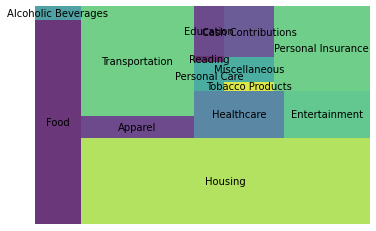

In [13]:
# Create a treemap
import squarify

squarify.plot(sizes=tmap['expenditure'], label=tmap['category'], alpha=.8 )
plt.axis('off')
plt.show()

<ipython-input-20-a20e3a4f24ee>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tmap.sort_values('expenditure', ascending=False, inplace=True)


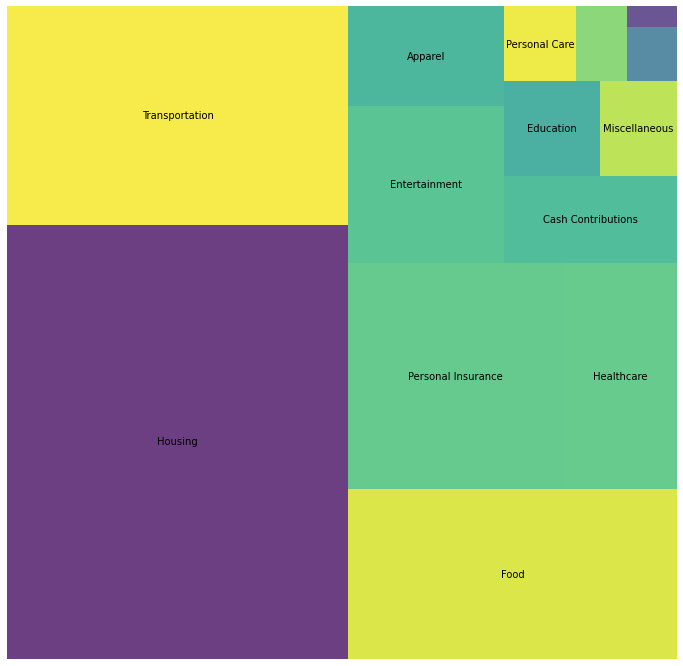

In [20]:
# Sort values to organize the treemap and only label the higher scoring values to declutter
tmap.sort_values('expenditure', ascending=False, inplace=True)

fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=tmap['expenditure'], 
              label=tmap['category'][:11], 
              alpha=.8 )
plt.axis('off')
plt.show()

In [53]:
# Use plotly to check out the 8 year dataset as a treemap
import plotly.express as px

fig = px.treemap(eightYr, 
                 path=['year', 'category'], 
                 values='expenditure',
                 color='expenditure',
                 color_continuous_scale=px.colors.sequential.YlGnBu,
                 title = ('Annual Household Expenditures 2000-2008')
                )
fig.show()

In [54]:
# Subset data to create an area chart to look at the cost of transportation over time
trans = df[df.category == "Transportation"]

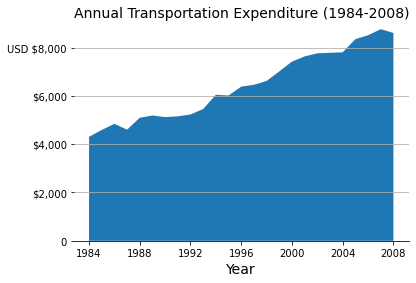

In [102]:
# Area plot
fig, ax = plt.subplots()

# Remove the right border
right = ax.spines["right"]
right.set_visible(False)

# Remove the top border
top = ax.spines["top"]
top.set_visible(False)

# Remove left border
left = ax.spines["left"]
left.set_visible(False)

plt.fill_between(trans.year, trans.expenditure)
plt.title("Annual Transportation Expenditure (1984-2008)", size=14, loc='left')
plt.xlabel("Year", size=14)
plt.ylim(0, 9000)
plt.grid(axis='y')
plt.yticks([0, 2000, 4000, 6000, 8000], [0, "$2,000", "$4,000", "$6,000", "USD $8,000"])
plt.xticks([1984, 1988, 1992, 1996, 2000, 2004, 2008])
plt.show()

In [89]:
# Pivot df to prepare for construction of stacked area chart
wide_df = df.pivot(index='year', columns='category', values='expenditure')
wide_df

category,Alcoholic Beverages,Apparel,Cash Contributions,Education,Entertainment,Food,Healthcare,Housing,Miscellaneous,Personal Care,Personal Insurance,Reading,Tobacco Products,Transportation
year,,,,,,,,,,,,,,
1984,275,1319,706,303,1055,3290,1049,6674,451,289,1897,132,228,4304
1985,306,1420,805,321,1170,3477,1108,7087,529,303,2016,141,219,4587
1986,271,1346,746,314,1149,3448,1135,7292,522,303,2127,140,230,4842
1987,289,1446,741,337,1193,3664,1135,7569,562,330,2175,142,232,4600
1988,269,1489,693,342,1329,3748,1298,8079,578,334,2249,150,242,5093
1989,284,1582,900,367,1424,4152,1407,8609,643,366,2472,157,261,5187
1990,293,1618,816,406,1422,4296,1480,8703,842,364,2592,153,274,5120
1991,297,1735,950,447,1472,4271,1554,9252,860,399,2787,163,276,5151
1992,301,1710,958,426,1500,4723,1634,9477,765,387,2750,162,275,5228


In [92]:
# Reset the index so that year is a column again
wide_df.reset_index(level=0, inplace=True)

In [93]:
# Get a list of column names
labels = list(wide_df)
labels

['year',
 'Alcoholic Beverages',
 'Apparel',
 'Cash Contributions',
 'Education',
 'Entertainment',
 'Food',
 'Healthcare',
 'Housing',
 'Miscellaneous',
 'Personal Care',
 'Personal Insurance',
 'Reading',
 'Tobacco Products',
 'Transportation']

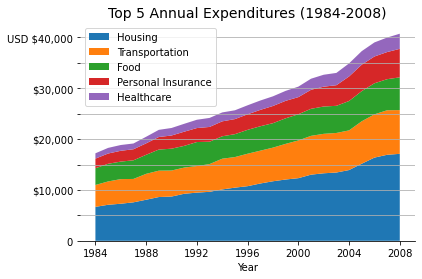

In [112]:
# Create stacked area plot with the five highest scoring expenditures
import seaborn as sns

fig, ax = plt.subplots()

# Remove the right border
right = ax.spines["right"]
right.set_visible(False)

# Remove the top border
top = ax.spines["top"]
top.set_visible(False)

# Remove left border
left = ax.spines["left"]
left.set_visible(False)

# Select a seaborn color palette
pal = sns.color_palette("Set1")

plt.stackplot(wide_df.year, wide_df.Housing, wide_df.Transportation, wide_df.Food, wide_df['Personal Insurance'], 
              wide_df.Healthcare, labels=['Housing', 'Transportation', 'Food', 'Personal Insurance', 'Healthcare'], 
             colors=pal, alpha=0.4)
plt.legend(loc='upper left')
plt.yticks([0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000], [0, "", "$10,000", "", "$20,000", 
                                                                       "", "$30,000", "", "USD $40,000"])
plt.xticks([1984, 1988, 1992, 1996, 2000, 2004, 2008])
plt.title("Top 5 Annual Expenditures (1984-2008)", size=14)
plt.xlabel("Year")
plt.grid(axis='y')
plt.show()